In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sb
import datetime as dt
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report



from sklearn.cross_validation import cross_val_score
%matplotlib inline


#Reading in our data and checking the first 10 rows
medical_data=pd.read_csv('KaggleV2-May-2016.csv',header=0,parse_dates=['ScheduledDay','AppointmentDay'],na_values='',names=['PatientId','AppointmentID','Gender','ScheduledDay','AppointmentDay','Age','Neighbourhood','Scholarship','Hypertension','Diabetes','Alcoholism','Disabled','SMS Received','No-show' ])
print(medical_data.head(10))

def add_col(dataframe,newcolname,names):
    dataframe[newcolname]=0
    for i in names:
        dataframe[newcolname]=dataframe[newcolname]+dataframe[i]
        
add_col(medical_data,'Pre-Existing Cond',['Hypertension','Diabetes','Alcoholism','Disabled'])

C:\Users\conor\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


      PatientId  AppointmentID Gender        ScheduledDay AppointmentDay  Age  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08     2016-04-29   62   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27     2016-04-29   56   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04     2016-04-29   62   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31     2016-04-29    8   
4  8.841186e+12        5642494      F 2016-04-29 16:07:23     2016-04-29   56   
5  9.598513e+13        5626772      F 2016-04-27 08:36:51     2016-04-29   76   
6  7.336882e+14        5630279      F 2016-04-27 15:05:12     2016-04-29   23   
7  3.449833e+12        5630575      F 2016-04-27 15:39:58     2016-04-29   39   
8  5.639473e+13        5638447      F 2016-04-29 08:02:16     2016-04-29   21   
9  7.812456e+13        5629123      F 2016-04-27 12:48:25     2016-04-29   19   

       Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0  

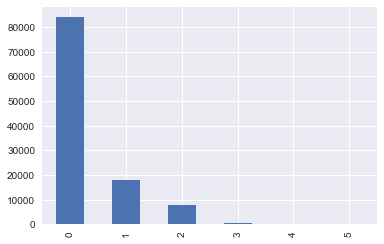

In [8]:
medical_data['Pre-Existing Cond'].value_counts().plot(kind='bar')

In [12]:
pre_con=medical_data['Pre-Existing Cond']>0
print(pre_con.head())
x=medical_data['No-show'][pre_con]
print(x.head())

0     True
1    False
2    False
3    False
4     True
Name: Pre-Existing Cond, dtype: bool
0     No
4     No
5     No
25    No
26    No
Name: No-show, dtype: object


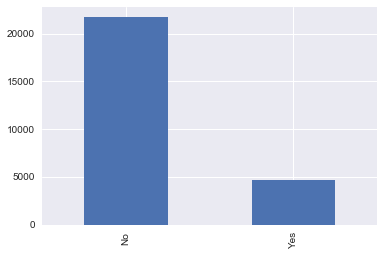

In [13]:
x.value_counts().plot(kind='bar')